In [19]:
import pandas as pd

In [20]:
df_encode = pd.read_csv('../../data/processed/realestates_kh_encode_v1.csv')

In [21]:
y = df_encode[['price']]
X = df_encode.drop(columns=['price'])

In [33]:
df_encode.shape

(3371, 323)

In [22]:
df_encode.isnull().sum()

price                        0
bedrooms                     0
bathrooms                    0
land_area                    0
latitude                     0
                            ..
category_name_condo          0
category_name_other          0
category_name_project        0
category_name_residential    0
type_residential             0
Length: 323, dtype: int64

In [23]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X, y.values.ravel(), random_state=42)
mutual_info

array([4.11219691e-01, 3.74204817e-01, 7.17119406e-01, 0.00000000e+00,
       0.00000000e+00, 3.52647575e-01, 2.51469117e-02, 3.50936582e-02,
       7.43646742e-02, 8.11509033e-02, 1.16547389e-01, 8.24977920e-03,
       5.44788827e-02, 6.66495289e-02, 7.01936568e-02, 9.07948666e-02,
       2.93904904e-02, 3.86234614e-02, 5.24301255e-02, 6.89223849e-02,
       9.45098498e-02, 1.66864411e-02, 2.79624690e-02, 4.96222363e-02,
       7.37016262e-02, 6.31354645e-02, 2.94658187e-02, 4.86874279e-02,
       5.89192452e-02, 9.37486379e-02, 1.09660412e-01, 3.08218591e-02,
       3.51068398e-02, 5.59027654e-02, 5.53854304e-02, 7.53739972e-02,
       1.20721568e-02, 4.13641036e-02, 6.37475670e-02, 5.21780172e-02,
       6.94557168e-02, 1.24835644e-02, 6.05571746e-02, 4.18598521e-02,
       6.06215026e-02, 9.92882111e-02, 3.04524102e-02, 4.24134236e-02,
       4.91649229e-02, 7.01535998e-02, 7.39562459e-02, 1.75752522e-02,
       4.37252639e-02, 4.01119341e-02, 5.73850957e-02, 5.37393383e-02,
      

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

land_area                        0.717119
bedrooms                         0.411220
bathrooms                        0.374205
price_per_m2                     0.352648
n_cafe_in_3km_to_5km             0.116547
                                   ...   
address_line_2_Phsar Kandal I    0.000000
address_line_2_Phsar Depou II    0.000000
address_line_2_Phsar Depou I     0.000000
f_bridleway                      0.000000
f_trunk_link                     0.000000
Length: 322, dtype: float64

<Axes: title={'center': 'Mutual Information Scores for Features'}>

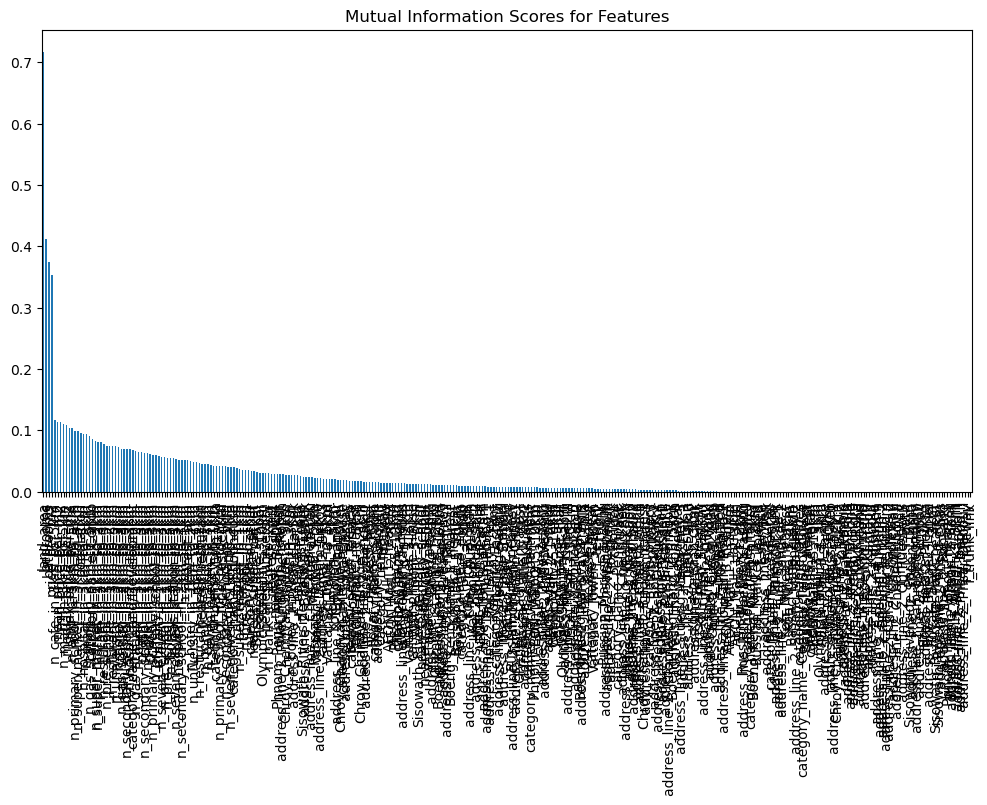

In [25]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12, 6), title='Mutual Information Scores for Features')

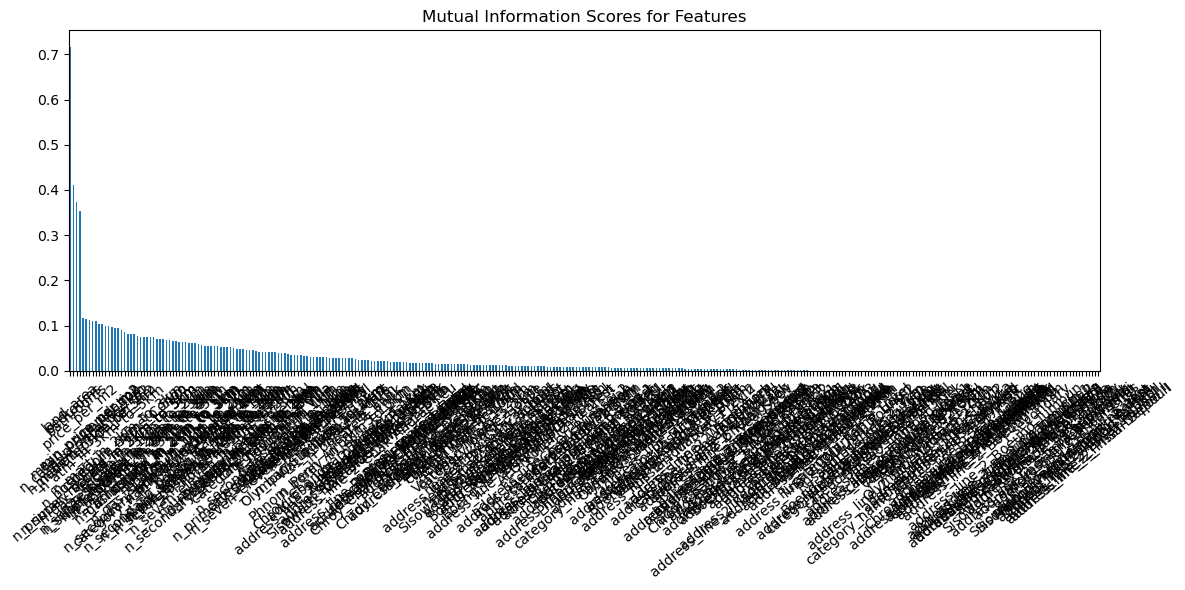

In [26]:
import matplotlib.pyplot as plt

ax = mutual_info.sort_values(ascending=False).plot.bar(
    figsize=(12, 6), 
    title='Mutual Information Scores for Features'
)
plt.xticks(rotation=40)  # Rotate x-axis labels for readability
plt.tight_layout()       # Adjust layout to prevent label cutoff
plt.show()

In [27]:
from sklearn.feature_selection import SelectKBest

In [28]:
selector = SelectKBest(mutual_info_regression, k=62)
selector.fit(X, y.values.ravel())
X.columns[selector.get_support()]


Index(['bedrooms', 'bathrooms', 'land_area', 'price_per_m2', 'n_cafe_in_1km',
       'n_cafe_in_1km_to_2km', 'n_cafe_in_2km_to_3km', 'n_cafe_in_3km_to_5km',
       'n_gas_station_in_1km', 'n_gas_station_in_1km_to_2km',
       'n_gas_station_in_2km_to_3km', 'n_gas_station_in_3km_to_5km',
       'nearest_hospital', 'n_hospital_in_1km_to_2km',
       'n_hospital_in_2km_to_3km', 'n_hospital_in_3km_to_5km',
       'n_hotel_in_2km_to_3km', 'n_hotel_in_3km_to_5km', 'n_mart_in_1km',
       'n_mart_in_1km_to_2km', 'n_mart_in_2km_to_3km', 'n_mart_in_3km_to_5km',
       'n_pre_school_in_1km_to_2km', 'n_pre_school_in_2km_to_3km',
       'n_pre_school_in_3km_to_5km', 'n_secondary_school_in_1km_to_2km',
       'n_secondary_school_in_2km_to_3km', 'n_secondary_school_in_3km_to_5km',
       'n_primary_school_in_1km', 'n_primary_school_in_2km_to_3km',
       'n_primary_school_in_3km_to_5km', 'n_university_in_1km_to_2km',
       'n_university_in_2km_to_3km', 'n_university_in_3km_to_5km',
       'n_seven_

In [29]:
# Get the selected features as a DataFrame for training
X_select = X.loc[:, selector.get_support()]

# If you want to combine with y for a full training DataFrame:
df_select = pd.concat([X_select, y], axis=1)

# Save to CSV if needed
df_select.to_csv('../../data/processed/realestates_kh_SelectKBest_v1.csv', index=False)

In [30]:
from sklearn.feature_selection import SelectPercentile

In [34]:
selectorP = SelectPercentile(mutual_info_regression, percentile=20)
selectorP.fit(X, y.values.ravel())
X.columns[selectorP.get_support()]

Index(['bedrooms', 'bathrooms', 'land_area', 'price_per_m2', 'n_cafe_in_1km',
       'n_cafe_in_1km_to_2km', 'n_cafe_in_2km_to_3km', 'n_cafe_in_3km_to_5km',
       'n_gas_station_in_1km', 'n_gas_station_in_1km_to_2km',
       'n_gas_station_in_2km_to_3km', 'n_gas_station_in_3km_to_5km',
       'n_hospital_in_1km', 'n_hospital_in_1km_to_2km',
       'n_hospital_in_2km_to_3km', 'n_hospital_in_3km_to_5km',
       'n_hotel_in_1km_to_2km', 'n_hotel_in_2km_to_3km',
       'n_hotel_in_3km_to_5km', 'nearest_mart', 'n_mart_in_1km',
       'n_mart_in_1km_to_2km', 'n_mart_in_2km_to_3km', 'n_mart_in_3km_to_5km',
       'n_pre_school_in_1km_to_2km', 'n_pre_school_in_2km_to_3km',
       'n_pre_school_in_3km_to_5km', 'n_secondary_school_in_1km_to_2km',
       'n_secondary_school_in_2km_to_3km', 'n_secondary_school_in_3km_to_5km',
       'n_primary_school_in_1km', 'n_primary_school_in_1km_to_2km',
       'n_primary_school_in_2km_to_3km', 'n_primary_school_in_3km_to_5km',
       'n_university_in_1km_to

In [35]:
# Get the selected features as a DataFrame for training
X_selectP = X.loc[:, selectorP.get_support()]

# If you want to combine with y for a full training DataFrame:
df_selectP = pd.concat([X_selectP, y], axis=1)

# Save to CSV if needed
df_selectP.to_csv('../../data/processed/realestates_kh_SelectPercentile_v1.csv', index=False)